In [1]:
%doctest_mode
%load_ext autoreload
%autoreload 2
#%matplotlib inline
#%matplotlib notebook
%matplotlib nbagg

Exception reporting mode: Plain
Doctest mode is: ON


In [2]:
import numpy as np
import openbabel as ob
import sys
sys.path.insert(0, '/Volumes/s/box/Box Sync/work/QTC')
import obtools as obt
import qctools as qc
import iotools as io
import matplotlib.pyplot as plt


In [15]:
d={'key1':1,'key2':2}
def change_dict(d):
    d['key1']=3
    d['key3']=3
    return d

def parse_qckeyword(keyword,calcindex=0):
    """
    Returns package, method, basis, task, xyzdir for a given qckeyword and calcindex.
    package, method, basis, task, xyzdir = parse_qckeyword('nwchem/ccsd/cc-pvz/opt,molpro/uccsdt/cc-pvtz/energy',1)
    print('package, method, basis, task, xyzdir = {0} {1} {2} {3} {4}'.format(package, method, basis, task, xyzdir))
    
    """
    keyword = keyword.replace('//','/opt,')
    xyzdir = ''
    package = 'nwchem'
    calcs = keyword.split(',')
    ncalc = len(calcs)
    currentcalc = calcs[calcindex]
    tokens = currentcalc.split('/')
    if calcindex > 0:
        package,method,basis,task,xyzdir = parse_qckeyword(keyword)
        xyzdir = io.join_path(*[package,method,basis,task])
        if len(tokens) == 1:
            task = tokens[0]
        elif len(tokens) == 2:
            task = 'energy'
            method, basis = tokens            
        elif len(tokens) == 3:
            task = 'energy'
            package, method, basis = tokens            
        elif len(tokens) == 4:
            package, method, basis, task = tokens
        else:
            print('Cannot parse qckeyword: {0}'.format(keyword))
    else:
        if len(tokens) == 2:
            task = 'opt'
            method, basis = tokens  
        elif len(tokens) == 3:
            task = 'opt'
            package, method, basis = tokens
        elif len(tokens) == 4:
            package, method, basis, task = tokens
        else:
            print('Cannot parse qckeyword: {0}'.format(keyword))
    return package, method, basis, task, xyzdir

package, method, basis, task, xyzdir = parse_qckeyword('nwchem/ccsd/cc-pvz//molpro/uccsdt/cc-pvtz/energy',1)
print('package, method, basis, task, xyzdir = {0} {1} {2} {3} {4}'.format(package, method, basis, task, xyzdir))
'qq'.sta

package, method, basis, task, xyzdir = molpro uccsdt cc-pvtz energy nwchem/ccsd/cc-pvz/opt


KeyError: ('key2', 'key1')

In [2]:
import pybel
mol=pybel.readstring('smi','[H][H]')
myzmat=mol.write('gzmat')
print myzmat,'done'
mol2=pybel.readstring('gzmat',myzmat)
myzmat2='# hhjhdada   dd ddd d ddd  ada dadad aj\n\n  dd d dd d  ddd ddd adda ad a dad adad da\n\n0,1\nLI\nH 1  r2\n\nr2= 0.0000'
print myzmat2,'done',repr(myzmat[45:55]),repr(myzmat2[45:55]),myzmat==myzmat2
mol3=pybel.readstring('gzmat',myzmat2)
print mol.write('smi'),mol2.write('smi')

myzmat[50:53]
mol = pybel.readstring('xyz','2\n\n1 1.9 2 2\n8 1 1 1')
obt.get_formula(mol)

#Put Keywords Here, check Charge and Multiplicity.

 

0  1
H
H  1  r2
Variables:
r2= 0.0000

done
# hhjhdada   dd ddd d ddd  ada dadad aj

  dd d dd d  ddd ddd adda ad a dad adad da

0,1
LI
H 1  r2

r2= 0.0000 done 'city.\n\n \n\n' ' d dd d  d' False
[H][H]	
[H].[H]	



NameError: name 'obt' is not defined

50 VCI states found
[  498.18  1406.65  1406.83  3103.34  3292.    3292.33]
1550 0.836437456744 0.754416762772
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]


<IPython.core.display.Javascript object>


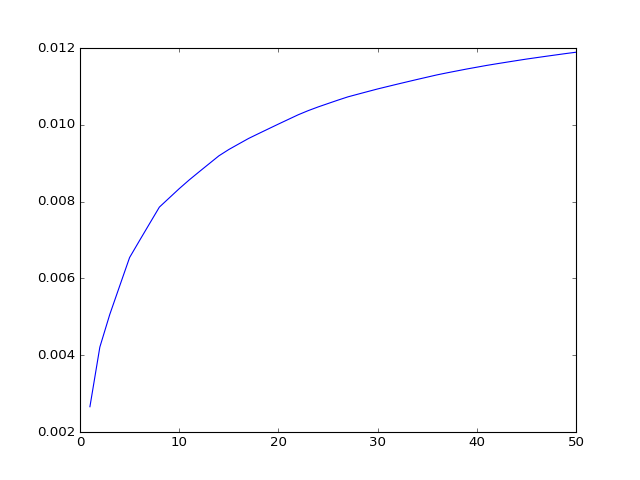

In [201]:
def get_partition_functions(energies,T,get_exponent=False):
    """
    Return the partition functions, Q(T), Q2(T):
    Q(T) = \Sum_{i=1}^N\exp(-E_i/(k_BT))
    Q2(T) = exp(E_0/(k_BT))Q(T)
    """
    k_B = 0.6950342314926 # cm-1/K
    k_BT = k_B * T
    exponent = np.exp(-energies/k_BT)
    Q = np.sum(exponent)
    Q2 = Q * np.exp(energies[0]/k_BT)
    if get_exponent:
        return Q,Q2,exponent
    else:
        return Q,Q2


def plot_pf_convergence(energies,T,npoints=10):
    """
    Plots the convergence of partition function wrt number of states
    """
    import matplotlib.pyplot as plt
    nenergies = len(energies)
    points = np.linspace(int(nenergies/npoints),nenergies,npoints,dtype='int32')
    print points
    k_B = 0.6950342314926 # cm-1/K
    k_BT = k_B * T
    exponent = np.exp(-energies/k_BT)
    Qs = np.zeros(npoints) 
    Q2s = np.zeros(npoints) 
    for i,point in enumerate(points):
        Qs[i] = np.sum(np.exp(-energies[:point]/k_BT))
        Q2s[i] = Qs[i] * np.exp(energies[0]/k_BT)
    plt.plot(points,Qs)
    

def get_harmonic_partition_functions(freqs,T):
    """
    Return harmonic oscillator vibrational partition function
    Q2 = \prod_i \frac{1}{1-\exp(-\freqs_i/k_BT)}
    """
    k_B = 0.6950342314926 # cm-1/K
    k_BT = k_B * T
    Q2 = 1
    zpe = sum(freqs)/2.
    for freq in freqs:
        Q2 = Q2 * 1. / (1-np.exp(-freq/k_BT))
        Q  = Q2 * np.exp(-zpe/k_BT)
    return Q,Q2



sindooutput = '/Volumes/s/keceli/gellmann/app/combustion/ch3/aDZ/direct/sindo.out'
sindooutput = '/Volumes/s/keceli/gellmann/app/combustion/hoo/aDZ/direct/sindotest/sindo.out'
sindooutput = '/Volumes/s/keceli/gellmann/app/combustion/ch3/aDZ/direct/sindo.out'
sindooutput = '/Volumes/s/keceli/gellmann/app/combustion/ch3/ccCBS/sindo.out'
s = iot.read_file(sindooutput)
vcikey = 'E(VCI)   ='
freqkey = 'FREQ :'

nenergies = s.count(vcikey)
print('{0} VCI states found'.format(nenergies))
energies = np.zeros(nenergies)
lines = s.splitlines()
i = 0
for line in (lines):
    if vcikey in line:
        energies[i] = float(line.split()[-1])
        i += 1
    elif freqkey in line:
        items = line.split()
        nfreq = len(items) - 2
        freqs = np.zeros(nfreq)
        for j,item in enumerate(items[2:]):
            freqs[j] = float(item)
print freqs
T=1550
q,q2= get_partition_functions(energies,T)        
hq,hq2 = get_harmonic_partition_functions(freqs,T)   
print T, q/hq, q2/hq2
plot_pf_convergence(energies,T,npoints=50)

In [16]:
t={'f':'F',
    'g':'G'}
t['k']='K'
t['m']='M'
li=['s','t','j','t']
s = set(li)
print len(s)
print '_'.join(s)
for key,value in t.iteritems():
    print key,value
empty={'s'}
available_packages=set(['nwchem', 'mopac', 'gaussian'])
nwdict = {
    'nre'        : 'Effective nuclear repulsion energy (a.u.)',
    'scf'        : 'Total SCF energy',
    'mp2'        : 'Total MP2 energy',
    'mp3'        : 'Total MP3 energy',
    'ccsd'       : 'CCSD total energy / hartree',
    'ccsd(t)'    : 'CCSD(T) total energy / hartree',
    'ccsd(2)_t'  : 'CCSD(2)_T total energy / hartree',
    'ccsd(2)'    : 'CCSD(2) total energy / hartree',
    'ccsdt'      : 'CCSDT total energy / hartree',
    'ccsdt(2)_q' : 'CCSDT(2)_Q total energy / hartree',
    'ccsdtq'     : 'CCSDTQ total energy / hartree'
}
nwdict = {
    0	:{'nre'        : 'Effective nuclear repulsion energy (a.u.)'},
    1	:{'scf'        : 'Total SCF energy'},
    2	:{'mp2'        : 'Total MP2 energy'},
    3	:{'mp3'        : 'Total MP3 energy'},
    4	:{'ccsd'       : 'CCSD total energy / hartree'},
    5	:{'ccsd(t)'    : 'CCSD(T) total energy / hartree'},
    6	:{'ccsd(2)_t'  : 'CCSD(2)_T total energy / hartree'},
    7	:{'ccsd(2)'    : 'CCSD(2) total energy / hartree'},
    8	:{'ccsdt'      : 'CCSDT total energy / hartree'},
    9	:{'ccsdt(2)_q' : 'CCSDT(2)_Q total energy / hartree'},
    10	:{'ccsdtq'     : 'CCSDTQ total energy / hartree'}
}
import pprint
print available_packages
if empty.issubset({'s','d','t'}):
    print empty
pprint.pprint(nwdict)
print nwdict[1].values()[0]
for i in range(10,-1,-1):
    print i

3
s_j_t
k K
m M
g G
f F
set(['nwchem', 'mopac', 'gaussian'])
set(['s'])
{0: {'nre': 'Effective nuclear repulsion energy (a.u.)'},
 1: {'scf': 'Total SCF energy'},
 2: {'mp2': 'Total MP2 energy'},
 3: {'mp3': 'Total MP3 energy'},
 4: {'ccsd': 'CCSD total energy / hartree'},
 5: {'ccsd(t)': 'CCSD(T) total energy / hartree'},
 6: {'ccsd(2)_t': 'CCSD(2)_T total energy / hartree'},
 7: {'ccsd(2)': 'CCSD(2) total energy / hartree'},
 8: {'ccsdt': 'CCSDT total energy / hartree'},
 9: {'ccsdt(2)_q': 'CCSDT(2)_Q total energy / hartree'},
 10: {'ccsdtq': 'CCSDTQ total energy / hartree'}}
Total SCF energy
10
9
8
7
6
5
4
3
2
1
0


In [132]:
#Reading G2 data set
gzmats = []
g2file= '/Volumes/s/G/qc_database/G2_97_NEUTRAL.txt'
lines = iot.read_file('/Volumes/s/G/qc_database/G2_97_NEUTRAL.txt',aslines=True)
iot.get_line_number
keyword = '--link1--'
n,m = 0,0
while (n < len(lines)): 
    n = iot.get_line_number(keyword,lines=lines[m:],getlastone=False)
    if n > 0:
        n += m + 1
    else:
        break
    if m > 0:
        gzmats.append(''.join(lines[m+1:n+m]))
    m = iot.get_line_number(keyword,lines=lines[n:],getlastone=False) + n + 1
    print n,m
    gzmats.append(''.join(lines[n+1:m-1]))
print repr(gzmats[0].replace('\r','').replace(' \n','\n'))
mol = pybel.readstring('gzmat',gzmats[1].replace('\r','').replace(' \n','\n').replace(',',' '))
#mol = pybel.readstring('gzmat',''.join(gzmats[0].splitlines(True)[4:]))

20 32
44 56
70 84
98 113
125 139
155 167
181 193
209 225
241 256
271 287
302 314
326 338
355 373
394 406
421 433
448 464
488 500
522 534
546 563
575 589
601 614
626 638
650 662
674 686
699 711
723 743
760 785
800 800
'# mp2(full)/6-31g* scf=direct\n\nLithium hydride (LiH), C*v symm. MP2(full)/6-31G* Geom. MP2=-7.9965108\n\n0,1\nLI\nH,1,R\n\nR=1.64\n\n'


In [10]:
#Trying to run nwchem
#iot.cd('nwchemtest')
s = iot.read_file('../templates/nwchem_tmp.txt')
inp = qct.get_qc_input('C',s,mult=3)
inpfile = 'ch4_m2.nw'
iot.write_file(inp,inpfile)
iot.execute(['nwchem',inpfile] ,stdoutfile='ch4_m2.log')


''

In [15]:
qct.run_nwchem('O',template='../templates/nwchem_tmp.txt')

'Run nwchem O.nw: Success.\n Output file: "/Volumes/s/box/Box Sync/work/QTC/nwchemtest/O_nwchem.log"\n'

In [5]:
def get_all_freqs(dirpath,pattern):
    hrmfreqs = []
    anhrmfreqs = []
    for log in iot.find_files(dirpath,pattern):
        s = iot.read_file(log)
        hrms = qct.getcc_frequencies(log)
        if min(hrms) > 0:
            print log
            nfreq= len(hrms)
            tmp = qct.get_gaussian_fundamentals(s)
            if type(tmp) is not str:
                freqs = tmp
                if freqs.max() < 5000 and freqs.min() > 0:
                    hrms2 = freqs[:,0]
                    i = 0 
                    for hrm in hrms:
                        hrmfreqs.append(hrm)
                        hrm2 = freqs[i,0]
                        anhrm = freqs[i,1]
                        i += 1
                        diff = abs(hrm-hrm2) 
                        if diff > 1:
                            print hrm,log, diff
                        anhrmfreqs.append(anhrm)
                else:
                    print "weird freq for",log, freqs
            else:
                print"error in log", log, tmp
    return (np.array(hrmfreqs),np.array(anhrmfreqs))
freqs,afreqs = get_all_freqs('/Volumes/s/database/logs/mp2-ccpvdz/', '*')

/Volumes/s/database/logs/mp2-ccpvdz/C#C.log
weird freq for /Volumes/s/database/logs/mp2-ccpvdz/C#C.log [[  5.60182000e+02   1.91520044e+07]
 [  5.60182000e+02   1.91520158e+07]
 [  7.50682000e+02   7.26283000e+02]
 [  1.96523100e+03   1.92586900e+03]
 [  3.45345700e+03   3.31131200e+03]
 [  3.53847000e+03   3.40657400e+03]]
/Volumes/s/database/logs/mp2-ccpvdz/C.log
error in log /Volumes/s/database/logs/mp2-ccpvdz/C.log Not found: Fundamental Bands (DE w.r.t. Ground State)
/Volumes/s/database/logs/mp2-ccpvdz/C=C.log
/Volumes/s/database/logs/mp2-ccpvdz/C=C=O.log
/Volumes/s/database/logs/mp2-ccpvdz/C=CC.log
/Volumes/s/database/logs/mp2-ccpvdz/C=CC=O.log
/Volumes/s/database/logs/mp2-ccpvdz/C=CCO.log
/Volumes/s/database/logs/mp2-ccpvdz/C=CCOO.log
/Volumes/s/database/logs/mp2-ccpvdz/C=CCpOrO[O].log
error in log /Volumes/s/database/logs/mp2-ccpvdz/C=CCpOrO[O].log Not found: Fundamental Bands (DE w.r.t. Ground State)
/Volumes/s/database/logs/mp2-ccpvdz/C=CCp[O]rO.log
/Volumes/s/database/logs/m

597 3786.44


<IPython.core.display.Javascript object>


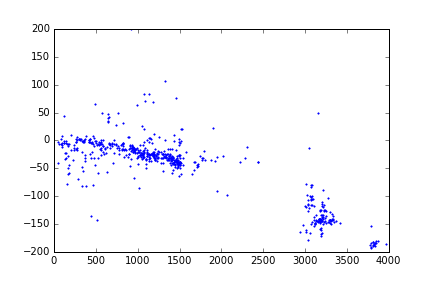

<IPython.core.display.Javascript object>


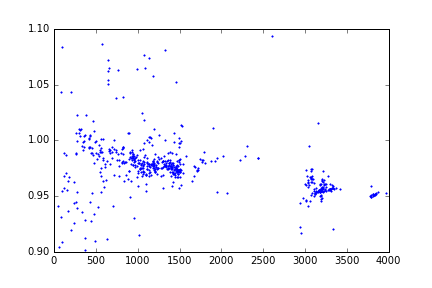

<IPython.core.display.Javascript object>


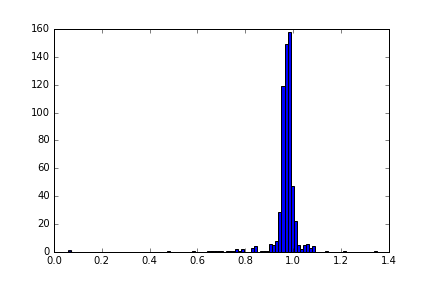

In [33]:
print len(freqs),max(afreqs)
plt.plot(freqs,(afreqs-freqs),ls='none', marker='.',markersize=3)
plt.ylim([-200,200])
anhrmfactors= (afreqs)/freqs
plt.figure()
plt.plot(freqs,anhrmfactors,ls='none', marker='.',markersize=3)
plt.show()
plt.ylim([0.9,1.1])
plt.figure()
plt.hist(anhrmfactors,100)
plt.show()

(array([ 24.,  38.,  37.,  25.,  17.,  28.,  26.,  30.,  24.,  35.,  30.,
         20.,  26.,  18.,  24.,  12.,  19.,  23.,  25.,  33.,  52.,  36.,
         44.,  56.,  51.,  43.,  48.,  36.,  50.,  39.,  65.,  63.,  94.,
         30.,   6.,   1.,   3.,  11.,   5.,   6.,   3.,   2.,   4.,   4.,
          1.,   1.,   1.,   1.,   2.,   1.,   1.,   1.,   1.,   2.,   4.,
          0.,   1.,   2.,   1.,   1.,   0.,   1.,   1.,   4.,  11.,  15.,
         30.,  41.,  44.,  41.,  57.,  48.,  17.,  25.,   7.,   3.,   1.,
          0.,   1.,   0.,   0.,   2.,   5.,   7.,  17.,   7.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([   14.967   ,    59.829919,   104.692838,   149.555757,
          194.418676,   239.281595,   284.144514,   329.007433,
          373.870352,   418.733271,   463.59619 ,   508.459109,
          553.322028,   598.184947,   643.047866,   687.910785,
          732.773704,   777.636623,   822.499542,   867.362461,

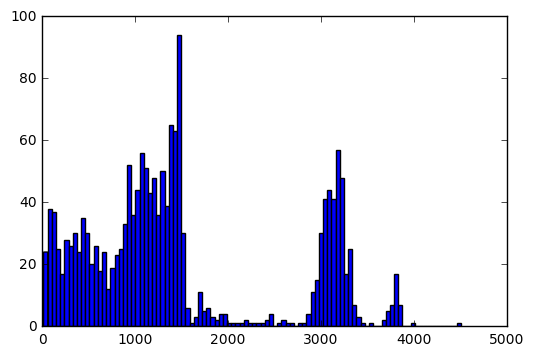

In [15]:
plt.hist(freqs,100)

(2800, 3400)

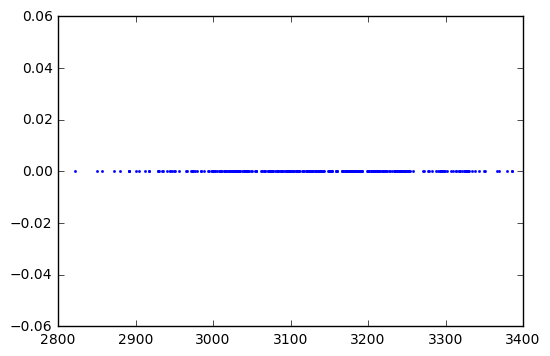

In [19]:
plt.plot(freqs,np.zeros_like(freqs),ls='none', marker='.',markersize=3)
plt.xlim([2800,3400])

In [61]:
s =iot.read_file('/Volumes/s/database/logs/BNCCMQURJDUSRG-UHFFFAOYSA-N1.log')
funds = qct.get_gaussian_fundamentals(s)
#funds = np.array([[6,1],[5,3],[1,2]])
print funds.min()
#print funds[funds[:,0].argsort()]

48.777


In [11]:
print qct.getcc_frequencies('/Volumes/s/database/logs/BNCCMQURJDUSRG-UHFFFAOYSA-N1.log')
ccparser.

[   48.7773    84.1545   102.8927   157.0204   294.7174   329.0554
   371.3081   427.5268   469.6605   561.2508   668.4822   804.1022
   927.6979   932.4164   951.8395   986.3956  1024.4133  1037.1575
  1120.8754  1166.9851  1193.7968  1243.0645  1264.9383  1298.9739
  1300.7582  1361.1969  1387.6287  1441.6545  1476.3277  1724.9121
  1752.4544  2949.0234  3014.9505  3081.9159  3133.1135  3153.0351
  3211.1099  3228.3245  3754.8638]


{'basis_set': u'CC-pVDZ', 'package_version': u'09revisionA.02', 'functional': u'B3LYP', 'methods': ['DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT', 'DFT'], 'package': 'Gaussian'}

In [103]:
#To start mongo
#mongod --logpath /Volumes/s/G/database_mongo/log --fork --dbpath /Volumes/s/G/database_mongo/
import pymongo
import json
from pymongo import MongoClient
client = MongoClient()
db = client.test_database
print client.HOST
qtcdatabase= db.qtcdatabase
ccparser = qct.parse_cclib('/Volumes/s/database/logs/BNCCMQURJDUSRG-UHFFFAOYSA-N1.log')
#ccparser.writejson

localhost


In [126]:
logfile='/Volumes/s/database/logs/BNCCMQURJDUSRG-UHFFFAOYSA-N1.log'
logfile='/Volumes/s/database/logs/mp2-ccpvdz/[H][H].log'
#data = json.loads(ccparser.writejson())
db=client.test2
qtcdatabase= db.qtcdatabase

lines = iot.read_file(logfile)
ccparser = qct.parse_cclib(logfile)
xyz = qct.getcc_xyz(ccparser)
mol = obt.get_mol(xyz)
smiles = mol.write('smiles').strip()
inchi = mol.write('inchi').strip()
data = {'_id': 'uniqueid2', 'smiles2': smiles, 'inchi': inchi}
data2 = {'_id': 'uniqeid','test2':2}
#qtcdatabase.repla(data)
print dataid
print dataid
qtcdatabase.replace_one({'inchi': inchi},{'inchi': 'newinchi'})

uniqueid2
uniqueid2


In [155]:
import dbtools as db
qtccollection = db.get_collection('qtccollection')
qtcdatabase = db.get_database(qtccollection,'qtcdatabase')
smileslist = iot.read_list('qc_list.txt')
for s in smileslist:
    mol = obt.get_mol(s)
    data = {}
    data['smiles'] = s
    data['inchi'] = mol.write('inchi').strip()
    data['multiplicity'] = obt.get_multiplicity(mol)
    data['formula'] = obt.get_formula(mol)
    data['number of atoms'] = obt.get_natom(mol)
    data['number of heavy atoms'] = obt.get_natom_heavy(mol)
    data['number of electrons'] = obt.get_nelectron(mol)
    data['number of rotors'] = obt.get_nrotor(mol)
    nesteddata = {}
    nesteddata['energ']
    db.insert_entry(data,qtcdatabase,efilter={'smiles':s})
    

In [209]:
pprint.pprint(data)

{'formula': 'C5H7O2',
 'inchi': 'InChI=1S/C5H7O2/c1-4(3-6)5(2)7/h3-4H,1H2,2H3/t4-/m0/s1',
 'multiplicity': 2,
 'number of atoms': 14,
 'number of electrons': 53,
 'number of heavy atoms': 7,
 'number of rotors': 2,
 'smiles': '[CH2]C(C=O)C(C)=O'}


In [198]:
mol = obt.get_mol('[O][O]')
xyz = obt.get_xyz(mol)
print xyz
import numpy as np
import openbabel
coords = [ 0., 0., 0.,1.,0.,0.]
mol.OBMol.SetCoordinates(openbabel.double_array(coords))
#mol.OBMol.SetCoordinates(openbabel.double_array(np.zeros((2,3))))
print obt.get_xyz(mol)
print np.array(coords).reshape(2,3)
mol.OBMol.SetCoordinates(np.zeros(6,'float64'))
print obt.get_xyz(mol)


#for atom in mol.OBMol:
#    atom.SetVector(np.zeros(3))

2

O          1.11032       -0.01917       -0.03596
O          2.39232       -0.01917       -0.03596

2

O          0.00000        0.00000        0.00000
O          1.00000        0.00000        0.00000

[[ 0.  0.  0.]
 [ 1.  0.  0.]]


TypeError: in method 'OBMol_SetCoordinates', argument 2 of type 'double *'

In [206]:
print iot.join_path(*('x','y','','z'))

coords = get_coordinates_array(obt.get_xyz(obt.get_mol('C')))
print 'ddadAAA'.lower()

x/y/z
ddadaaa


In [106]:
import pybel
print qct.get_gaussian_xyz(lines)
ccparser = qct.parse_cclib(logfile)
print qct.getcc_xyz(ccparser)
print inchi,smiles,xyz
print data

None
2
Geometry 5
H      0.0000000000    0.0000000000    0.1228190000
H      0.0000000000    0.0000000000    0.8771810000
InChI=1S/H2/h1H [H][H]	Geometry 5 2
Geometry 5
H      0.0000000000    0.0000000000    0.1228190000
H      0.0000000000    0.0000000000    0.8771810000
{'inchi': 'InChI=1S/H2/h1H', 'smiles': '[H][H]\tGeometry 5', '_id': ObjectId('593189fc67f4091ebeb92ddc')}


In [153]:
d = {'k1': 'v1', 'k2':'v2'}
print d
d['k3']='v3'
print d
d.update({'k4':'v4'})
print d.values()

{'k2': 'v2', 'k1': 'v1'}
{'k3': 'v3', 'k2': 'v2', 'k1': 'v1'}
['v3', 'v2', 'v1', 'v4']


In [20]:
qtc.insert_one(json.loads(data))

In [19]:
import json
json.loads(data)

{u'smiles': u'C=CCO/C=C/O\t\n', u'inchikey': u'BNCCMQURJDUSRG-HWKANZROSA-N\n', u'chemical json': 0, u'bonds': {u'connections': {u'index': [8, 1, 9, 1, 1, 2, 2, 10, 2, 3, 12, 3, 11, 3, 3, 4, 4, 5, 13, 5, 5, 6, 6, 14, 6, 7, 15, 7]}, u'order': [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]}, u'optimization': {u'status': [1, 0, 0, 0, 0, 0, 2, 2], u'done': True, u'geometric values': [[0.011672, 0.003278, 0.393954, 0.106206], [0.011941, 0.003285, 0.753918, 0.2131], [0.013393, 0.003331, 0.64411, 0.180342], [0.00722, 0.001736, 1.041868, 0.326239], [0.001564, 0.000621, 0.094017, 0.03628], [0.000146, 3.6e-05, 0.015464, 0.006755], [8e-06, 2e-06, 0.000254, 9.3e-05], [8e-06, 2e-06, 0.000253, 9.2e-05]], u'geometric targets': [0.00045, 0.0003, 0.0018, 0.0012], u'scf': {u'scf energies': [-9407.843904520028, -9407.850183683186, -9407.879641204803, -9407.922701398482, -9407.978751572675, -9407.984296681509, -9407.98434775728, -9407.98434775728, -9407.981816853566, -9407.981691817253, -9407.982421272853, -94

In [14]:
smileslist = iot.read_list('qc_list.txt')

s1=smileslist[0]
print s1
m1 = obt.get_mol(s1)
print s1,m1.write('inchi').strip(), cirpy.resolve(s1,'iupac_name',resolvers=['smiles']), obt.get_formula(m1), obt.get_natom(m1), obt.get_natom_heavy(m1),obt.get_mult(m1),cirpy.resolve(s1,'rotor_count',resolvers=['smiles']),cirpy.resolve(s1,'effective_rotor_count',resolvers=['smiles'])
print(s1,m1.write('inchi').strip(), cirpy.resolve(s1,'iupac_name',resolvers=['smiles']), obt.get_formula(m1), obt.get_natom(m1), obt.get_natom_heavy(m1),obt.get_mult(m1),cirpy.resolve(s1,'rotor_count',resolvers=['smiles']),cirpy.resolve(s1,'effective_rotor_count',resolvers=['smiles']))

In [165]:
import cirpy
print cirpy.resolve('formaldehyde','smiles')

print cirpy.resolve('C=O','iupac_name')
import obtools as obt
print obt.fetch_cirpy_name('C=O')

C=O
FORMALDEHYDE


'FORMALDEHYDE'

In [44]:
with open('species.txt','w') as f:
    for s1 in smileslist:
        m1 = obt.get_mol(s1)
        txt = "{0} {1} {2} {3} {4} {5} {6} {7} {8}\n".format(s1,
                                                               m1.write('inchi').strip(), 
                                                               cirpy.resolve(s1,'iupac_name',resolvers=['smiles']).replace(" ","_"), 
                                                               obt.get_formula(m1), 
                                                               obt.get_natom(m1), 
                                                               obt.get_natom_heavy(m1),
                                                               obt.get_mult(m1),
                                                               cirpy.resolve(s1,'rotor_count',resolvers=['smiles']),
                                                               cirpy.resolve(s1,'effective_rotor_count',resolvers=['smiles']))
        f.write(txt)

CertificateError: hostname u'cactus.nci.nih.gov' doesn't match either of 'login.globalsuite.net', '*.gtkcentral.net', '*.gtkserver.net'

In [76]:
mollist= [[]]*8785
for i,s1 in enumerate(smileslist):
    m1 = obt.get_mol(s1)
    mollist[i] = [obt.get_formula(m1),s1,m1.write('inchi').strip(),obt.get_natom(m1),obt.get_natom_heavy(m1),obt.get_nelectron(m1),obt.get_mult(m1)]
    

In [54]:
a=[[]]*2

In [64]:
a[0]=[4,2]
a[1]=[1,3]

In [73]:
m1.OBMol.GetTotalCharge()
n=0
for i in range(obt.get_natom(m1)):
    a=m1.OBMol.GetAtomById(i)
    n += a.GetAtomicNum()

In [74]:
print n

53


In [83]:
from operator import itemgetter
sortedmols = sorted(mollist,key=itemgetter(3,5))
with open('sorted_smiles.txt','w') as f:
    for mol in sortedmols:
        f.write(mol[1]+'\n')

In [145]:
i =1 
j = 1
for k in range(1,10):
    i = k

1
2
3
4
5
6
7
8
9


In [156]:
d= {'smi' : 'C', 'ccsd' : {'cc-pvdz': {'xyz': ' 1 2 4', 'energy':1.0}, 'cc-pvtz':{'xyz': ' 1 2 4', 'energy':2.0}} }

In [157]:
import pprint
pprint.pprint(d)

{'ccsd': {'cc-pvdz': {'energy': 1.0, 'xyz': ' 1 2 4'},
          'cc-pvtz': {'energy': 2.0, 'xyz': ' 1 2 4'}},
 'smi': 'C'}


In [ ]:
inp(keyword=value,kw2=)